## EDA PROCESS DATABASE

Luis Angel Garcia (2230177)

Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.append("../config_documents")

import postgres_setup as pg
import importlib



Postgres conection a creation users and table

In [3]:
importlib.reload(pg)
pg.crear_usuario_y_bd()

conn = pg.conectar_etl()

pg.crear_tabla_grammy_awards(conn)

El usuario 'etl_user' ya existe.
La base de datos 'spotify_analysis' ya existe.
Tabla 'grammy_awards' verificada/creada.


Load grammy csv

In [4]:
df = pd.read_csv("../datasets/the_grammy_awards.csv").fillna("TEMP_NULL")

print(df.columns.tolist())

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.rename(columns={"year": "ceremony_year",
                        "title": "work"
                        })

pg.insertar_datos_grammy_awards(conn, df)




['year', 'title', 'published_at', 'updated_at', 'category', 'nominee', 'artist', 'workers', 'img', 'winner']
Los datos ya están insertados. No se duplicaron registros.


read table from SQL

In [9]:
df = pd.read_sql("SELECT * FROM grammy_awards", conn)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4810 non-null   int64 
 1   ceremony_year  4810 non-null   int64 
 2   category       4810 non-null   object
 3   nominee        4810 non-null   object
 4   artist         4810 non-null   object
 5   work           4810 non-null   object
 6   winner         4810 non-null   bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 230.3+ KB


/tmp/ipykernel_5245/2682974416.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM grammy_awards", conn)


EDA process

In [ ]:
info = {
    "shape": df.shape,
    "columnas": df.columns.tolist(),
    "nulos": df.isnull().sum(),
    "tipos_dato": df.dtypes,
    "estadisticas": df.describe(include='all').transpose()
}
info

Graphics

In [ ]:
plt.figure(figsize=(12, 5))
df['ceremony_year'].value_counts().sort_index().plot(kind='bar', color='mediumseagreen')
plt.title('Cantidad de Premios por Año')
plt.xlabel('Año')
plt.ylabel('Número de Premios')
plt.tight_layout()
plt.show()

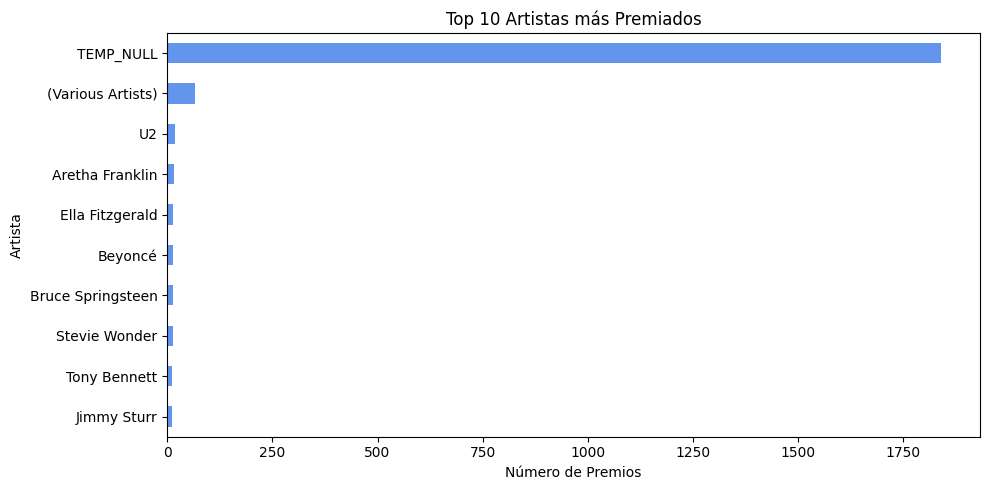

In [11]:
plt.figure(figsize=(10, 5))
df['artist'].value_counts().dropna().head(10).plot(kind='barh', color='cornflowerblue')
plt.title('Top 10 Artistas más Premiados')
plt.xlabel('Número de Premios')
plt.ylabel('Artista')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

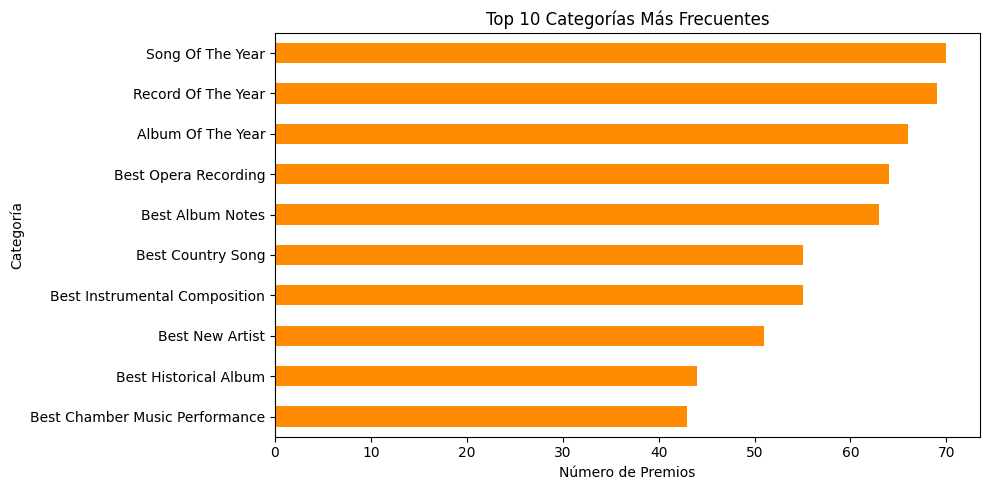

In [12]:
plt.figure(figsize=(10, 5))
df['category'].value_counts().head(10).plot(kind='barh', color='darkorange')
plt.title('Top 10 Categorías Más Frecuentes')
plt.xlabel('Número de Premios')
plt.ylabel('Categoría')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Close conection

In [54]:
conn.close()